## 허프 변환

### 직선 검출

2차원 영상 좌표에서 직선의 방정식을 파라미터 공간으로 변환 후 직선 찾기

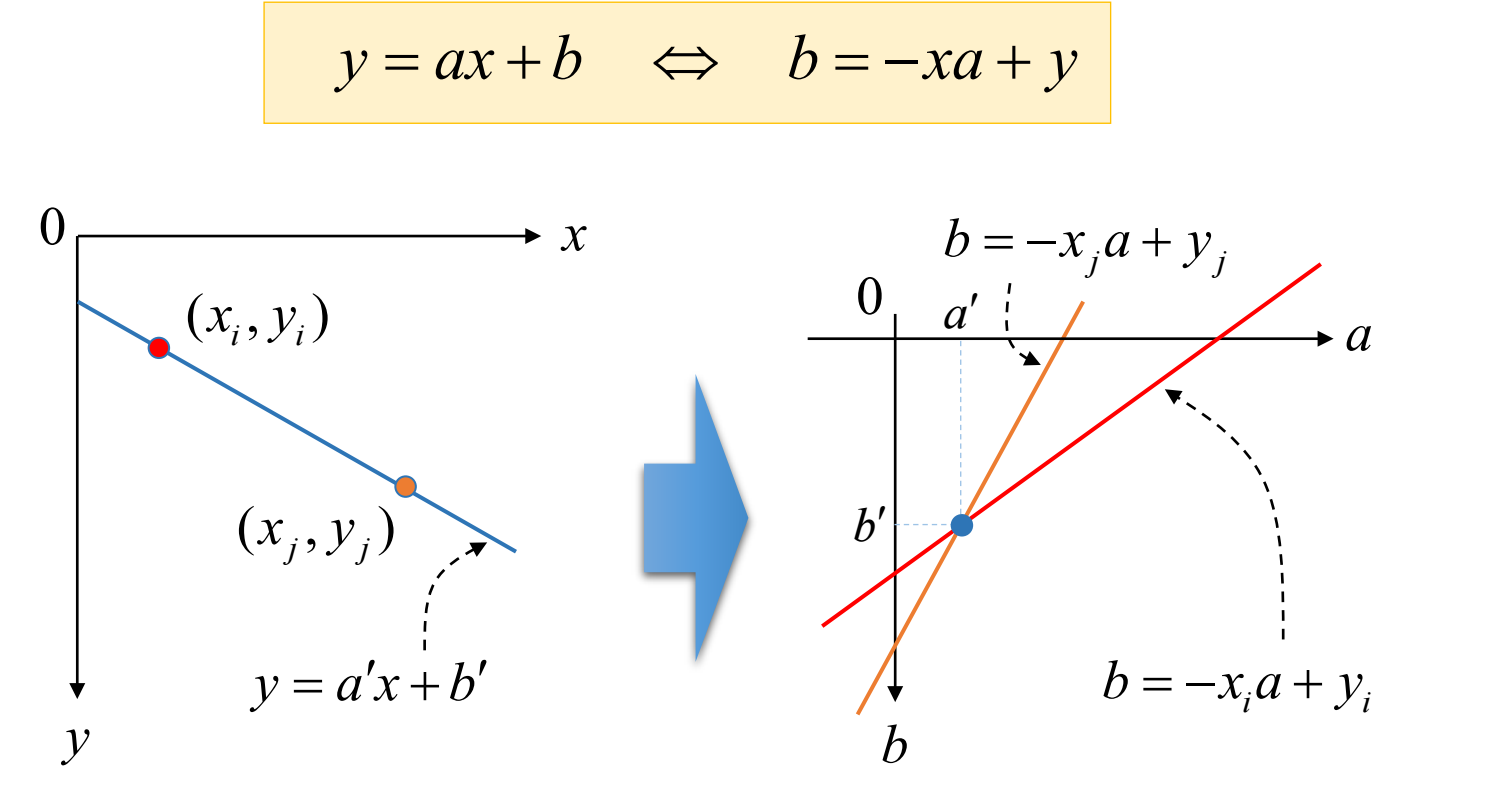

#### 축적배열

직선 성분과 관련 원소값을 1씩 증가

변화는 과정을 사진으로 표현하겠습니다.

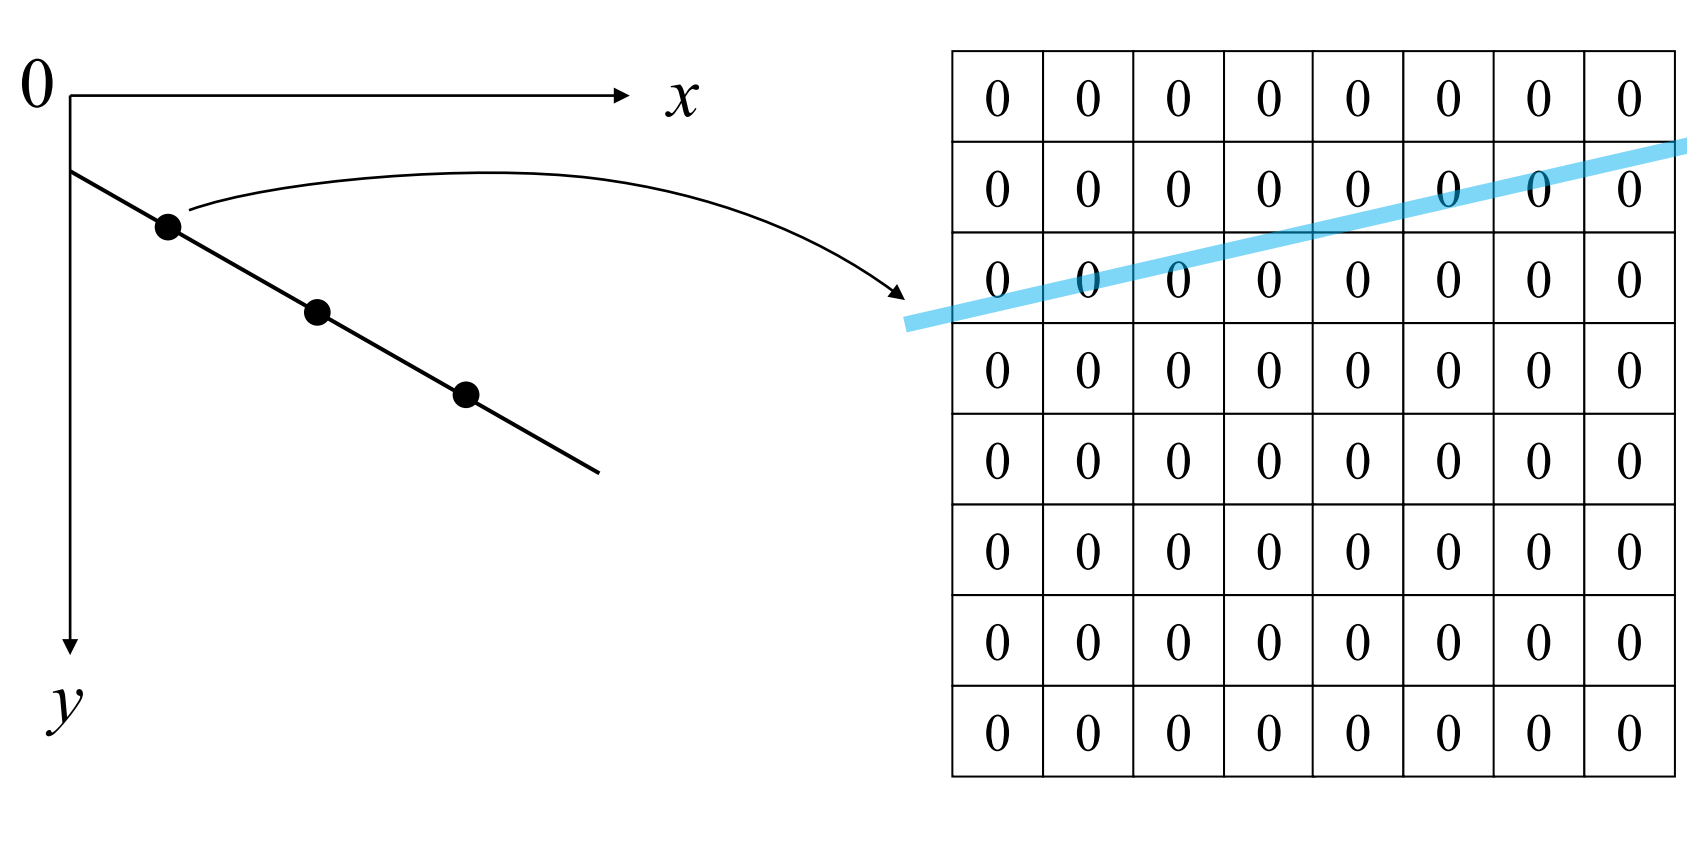

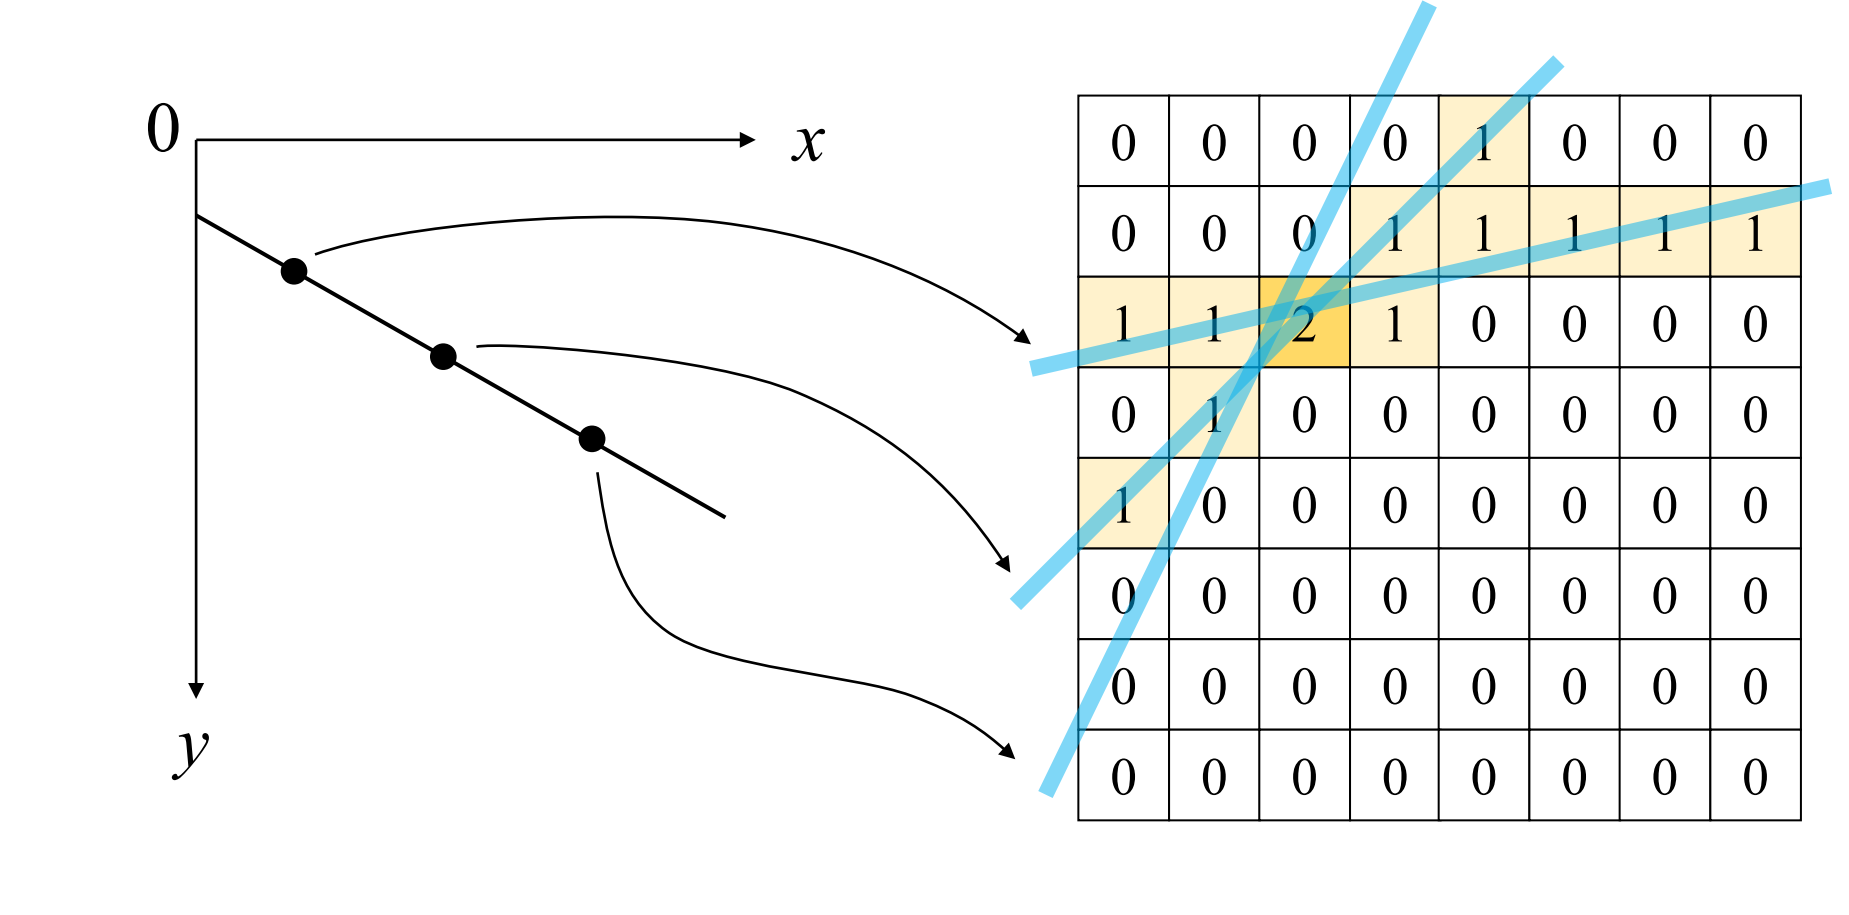

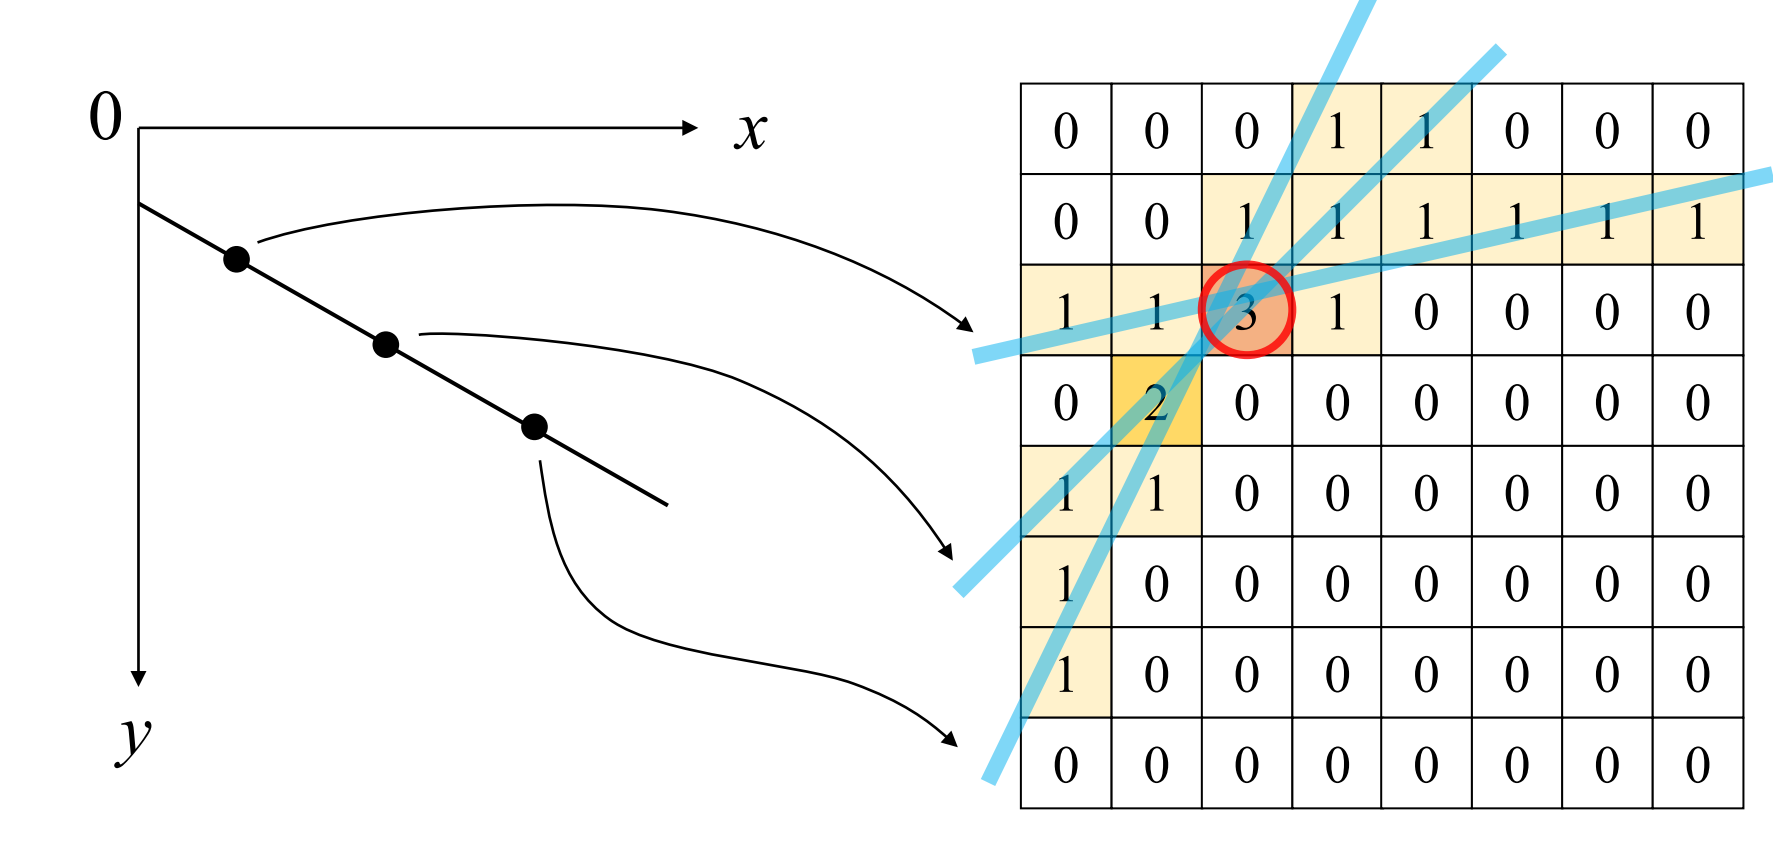

#### 직선의 방정식(y=ax+b) 문제점

y축과 평행한 수직선을 잘 표현하지 못해서 극좌표계 직선의 방정식을 쓴다.

*a는 세타

xcosa + ysina = p방정식에 의한 파라미터 공간으로 변환

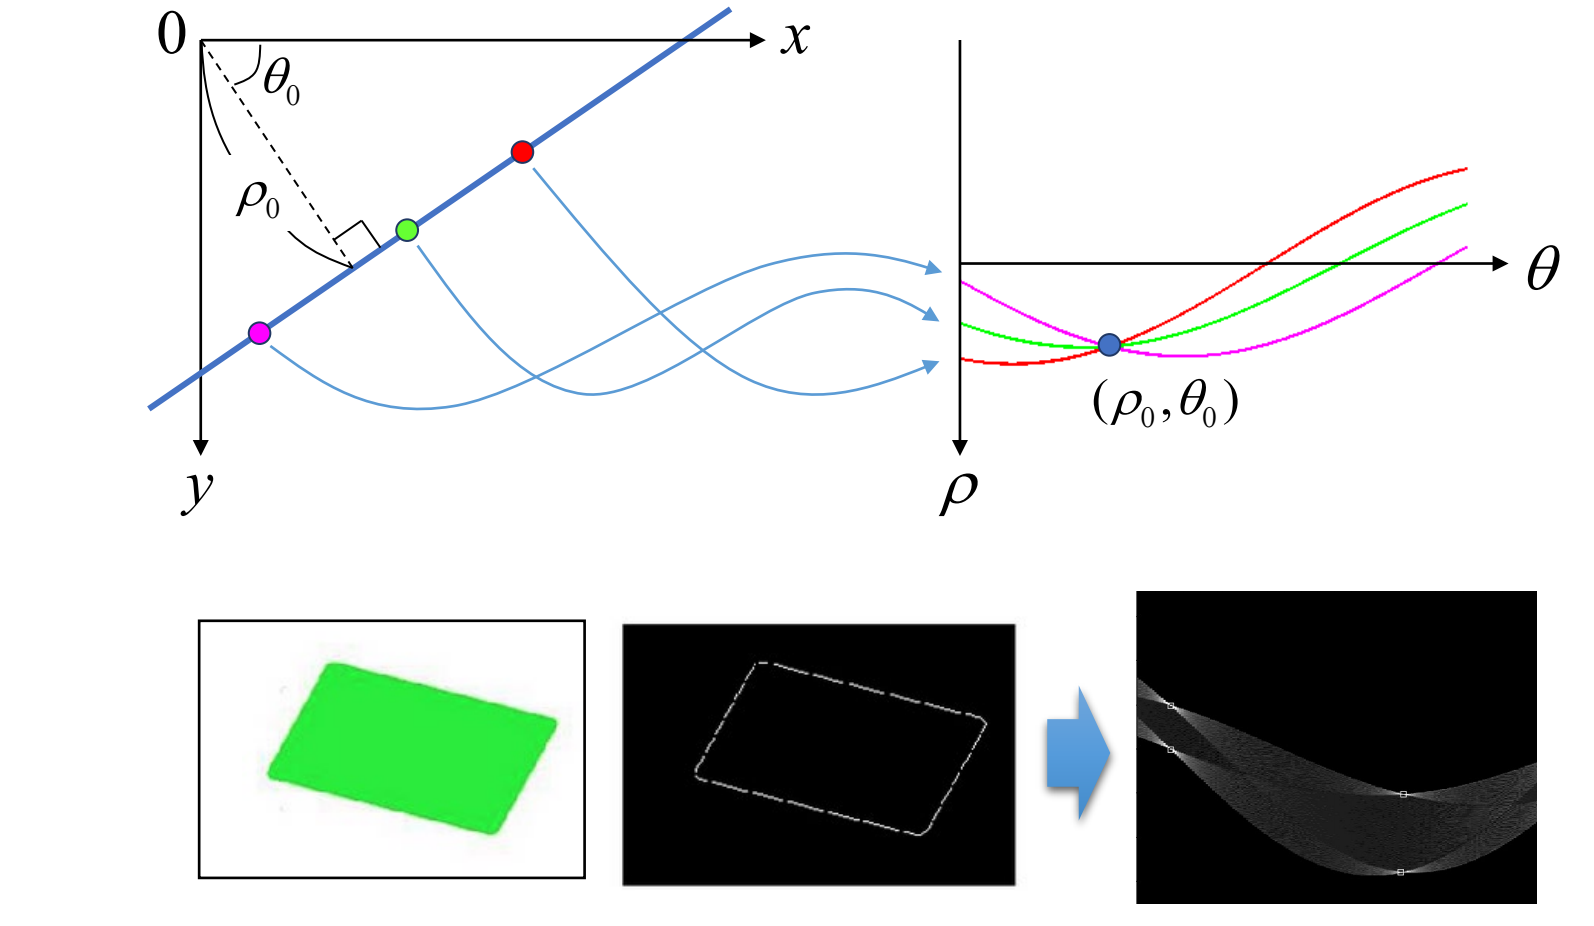

### 선분 검출

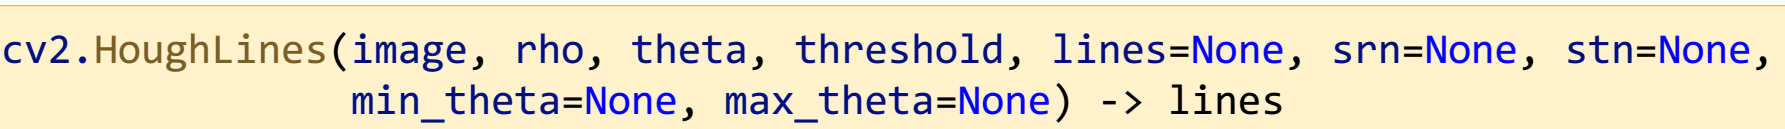

- image: 입력 에지 영상

- rho: 축적 배열에서 rho값의 간격으로 1.0->1픽셀 간격

- theta: 축적 배열에서 theta 값의 간격으로 np.pi/180 ->1도 간격

- threshold: 축적배열에서 직선을 판단할 임계값

- lines: 직선파라미터(rho,theta)정보를 담고 있는 numpy.ndarray.shape=(N,1,2).dtype=numpy.float32.

- srn,stn: 멀티 스케일 허프 변환에서 rho해상도, theta해상도를 나누는 값으로 기본 값은 0이고, 이때 일반 허프 변환 수행

- min_theta, max_theta: 검출할 선분의 최대 최소 theta값

#### 확률적 허프 변환 선분 검출

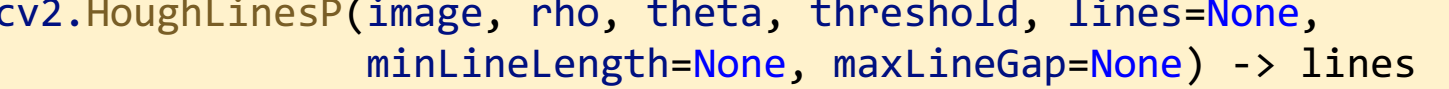

- image: 입력 에지 영상

- rho: 축적 배열에서 rho 값의 간격. (e.g.) 1.0  1픽셀 간격.

- theta: 축적 배열에서 theta 값의 간격. (e.g.) np.pi / 180  1° 간격.

- threshold: 축적 배열에서 직선으로 판단할 임계값

- lines: 선분의 시작과 끝 좌표(x1, y1, x2, y2) 정보를 담고 있는 numpy.ndarray.shape=(N, 1, 4). dtype=numpy.int32.

- minLineLength: 검출할 선분의 최소 길이

- maxLineGap: 직선으로 간주할 최대 에지 점 간격



## 예제

In [ ]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edges, 1.0, np.pi / 180., 160,
minLineLength=50, maxLineGap=5)
dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
if lines is not None:
for i in range(lines.shape[0]):
pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점 좌표
pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점 좌표
cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

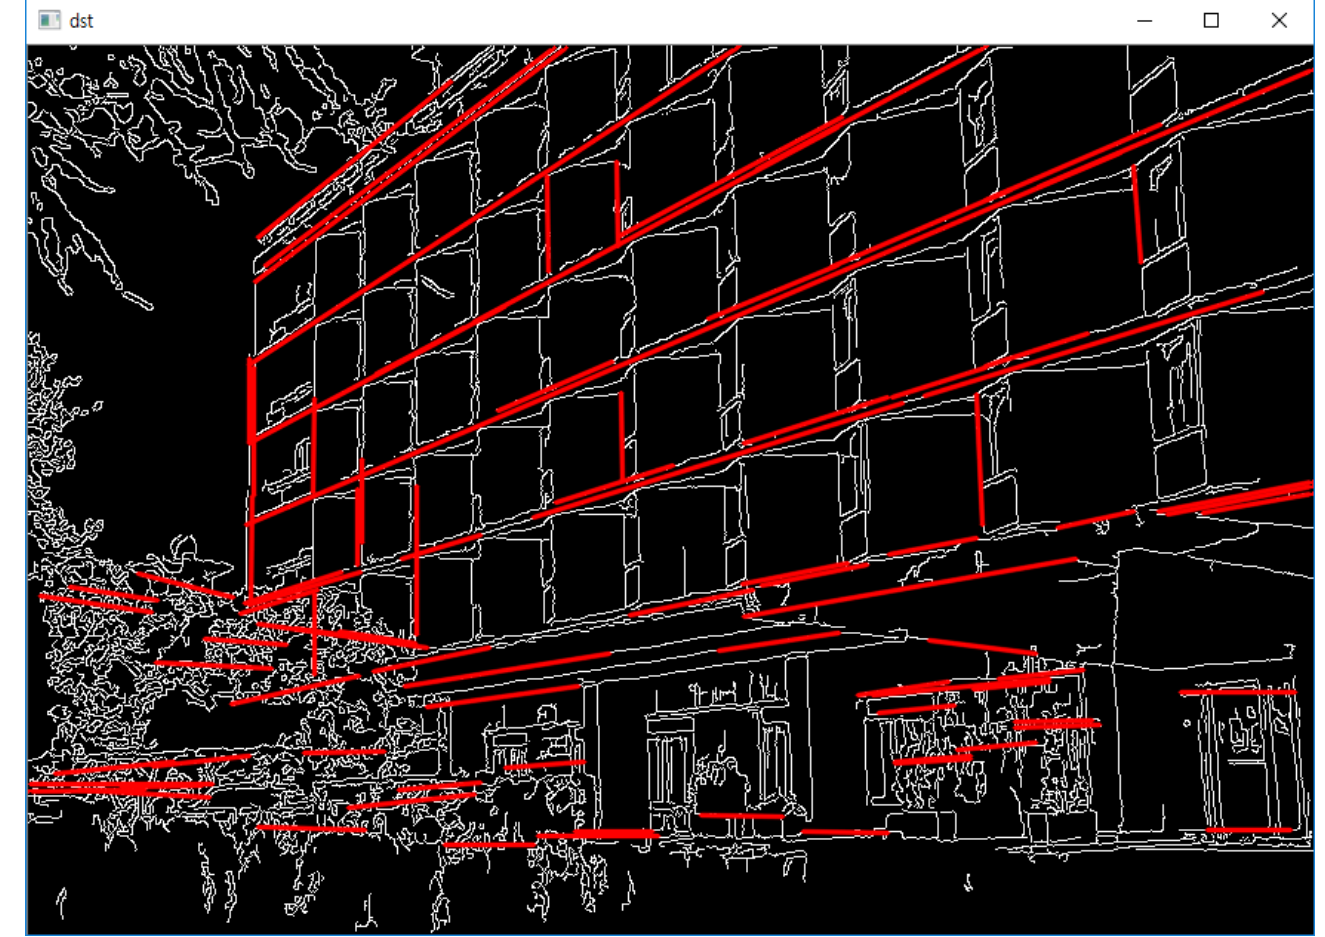